# 08/01/2026

# data tiding 

--DataTiding is the process of reshaping and cleaning the data so that:

-->Each variable forms a column
-->each obervation forms a row
-->each type of obervation unit forms a table




  Region Product  Jan_sales  Feb_sales  March_sales
0   East  Laptop        120        135          150
1   East  Tablet         80         90          100
2   West  Laptop        100        110          120
3   West  Tablet         70         85           90
   Region Product        Month  Sales
0    East  Laptop    Jan_sales    120
1    East  Tablet    Jan_sales     80
2    West  Laptop    Jan_sales    100
3    West  Tablet    Jan_sales     70
4    East  Laptop    Feb_sales    135
5    East  Tablet    Feb_sales     90
6    West  Laptop    Feb_sales    110
7    West  Tablet    Feb_sales     85
8    East  Laptop  March_sales    150
9    East  Tablet  March_sales    100
10   West  Laptop  March_sales    120
11   West  Tablet  March_sales     90
   Region Product   Month  Sales
0    East  Laptop    Jan     120
1    East  Tablet    Jan      80
2    West  Laptop    Jan     100
3    West  Tablet    Jan      70
4    East  Laptop    Feb     135
5    East  Tablet    Feb      90
6    West  Lapt

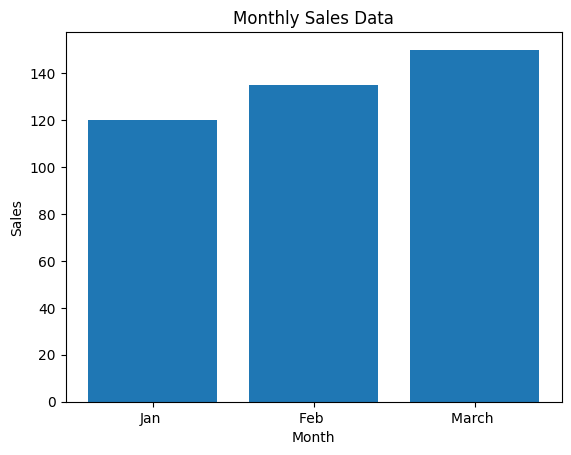

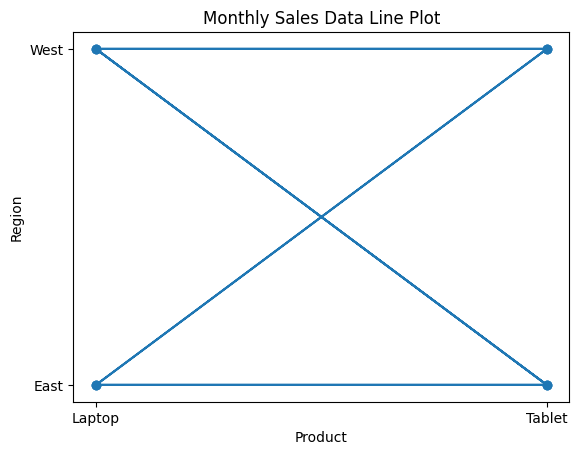

In [18]:
import pandas as pd

data = {
    "Region":["East","East","West","West"],
    "Product":["Laptop","Tablet","Laptop","Tablet"],
    "Jan_sales": [120,80,100,70],
    "Feb_sales":[135,90,110,85],
    "March_sales":[150,100,120,90]
    }

# create a dataFrame
df = pd.DataFrame(data)
print(df)

#tidying data
#identify identifier and measured variables
'''Identifiers : Region,Product
Measured Variables:Jan_sales,Feb_sales,March_sales'''


# convert the columns into rows using melt()
tidy_df = pd.melt(
    df,
    id_vars = ["Region","Product"],
    value_vars = ["Jan_sales","Feb_sales","March_sales"],
    var_name = "Month",
    value_name = "Sales"
    )
print(tidy_df)

#clean the monthdata (remove = 'false')
tidy_df["Month"] = tidy_df["Month"].str.replace("_sales"," ")
print(tidy_df)

import matplotlib.pyplot as plt

plt.bar(tidy_df['Month'], tidy_df['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Data')
plt.show()


# Example plot to visualize the tidy data
plt.plot(tidy_df['Product'], tidy_df['Region'], marker='o')
plt.xlabel('Product')
plt.ylabel('Region')
plt.title('Monthly Sales Data Line Plot')
plt.show()

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#load dataset
url  = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv"

df = pd.read_csv(url)
print(df)

df.head()



         country             food_category  consumption  co2_emmission
0      Argentina                      Pork        10.51          37.20
1      Argentina                   Poultry        38.66          41.53
2      Argentina                      Beef        55.48        1712.00
3      Argentina               Lamb & Goat         1.56          54.63
4      Argentina                      Fish         4.36           6.96
...          ...                       ...          ...            ...
1425  Bangladesh        Milk - inc. cheese        21.91          31.21
1426  Bangladesh  Wheat and Wheat Products        17.47           3.33
1427  Bangladesh                      Rice       171.73         219.76
1428  Bangladesh                  Soybeans         0.61           0.27
1429  Bangladesh   Nuts inc. Peanut Butter         0.72           1.27

[1430 rows x 4 columns]


,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [ ]:
# data inspection

In [3]:
df.shape

(1430, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [8]:
df.isna().sum()

country          0
food_category    0
consumption      0
co2_emmission    0
dtype: int64

In [12]:
#data tidying
#standardize column name

df.columns = df.columns.str.strip().str.lower().str.replace(" "," ")

# handle missing or zero comsumption values
zero_consumption = df[df["consumption"] == 0]
#print(zero_consumption.head())

       country food_category  consumption  co2_emmission
9    Argentina      Soybeans          0.0            0.0
31     Albania      Soybeans          0.0            0.0
264     Kuwait          Pork          0.0            0.0
361    Armenia      Soybeans          0.0            0.0
394  Venezuela      Soybeans          0.0            0.0


In [15]:
#add derivative variables - co2 per consumption 
df["co2_per_kg"] = df["co2_emmission"] / df["consumption"]
#handle division by zero
df["co2_per_kg"].fillna(0, inplace = True)

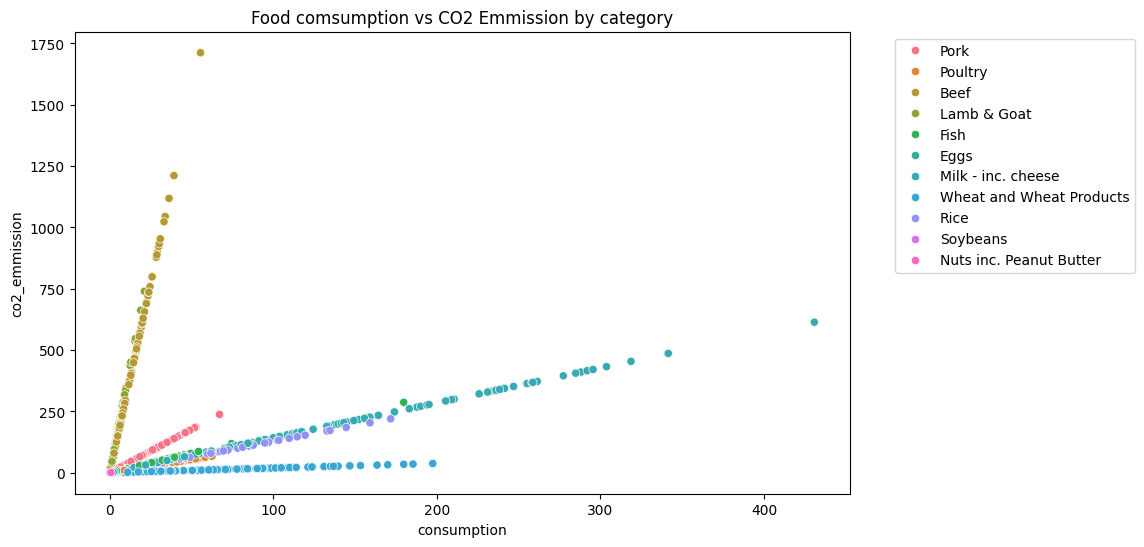

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data = df,
    x = "consumption",
    y = "co2_emmission",
    hue = "food_category"
    )
plt.title("Food comsumption vs CO2 Emmission by category")
plt.legend(bbox_to_anchor = (1.05,1),loc = 2)
plt.show()

## Time Series data 
- Level

- trend

   - up trending
  
   - down Trending
  
- seasonality

- Cyclic patterns

- Noise


2024-01-01    10
2024-01-02    23
2024-01-03    45
2024-01-04    21
2024-01-05    67
2024-01-06    89
2024-01-07    34
2024-01-08    52
2024-01-09    11
2024-01-10    66
Freq: D, dtype: int64


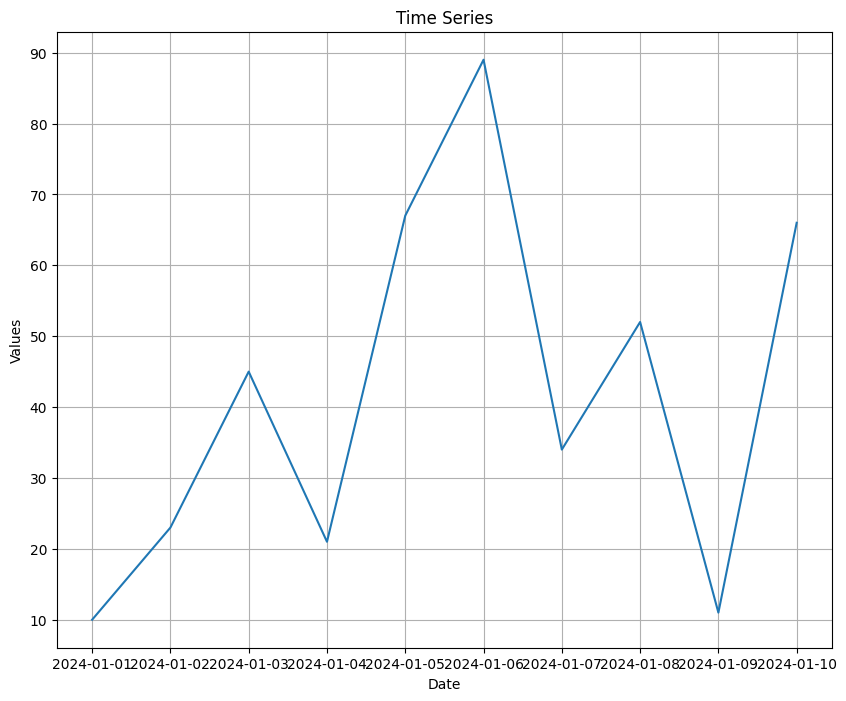

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# create dat range
dates= pd.date_range(start = "2024-01-01",periods = 10,freq = "D")

# create sample data
values = [10,23,45,21,67,89,34,52,11,66]

#create time series using pd.series()t
ts = pd.Series(values, index = dates)

print(ts)

# visulize time series

plt.figure(figsize=(10,8))
plt.plot(ts)
plt.title("Time Series")
plt.xlabel("Date")
plt.ylabel("Values")
plt.grid()
plt.show()

In [9]:
import yfinance as yf
data = yf.download("AAPL",start="2020-01-01",end="2024-01-01",auto_adjust=True)
print(data)
#print(data.columns)

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2020-01-02   72.468254   72.528574   71.223252   71.476592  135480400
2020-01-03   71.763733   72.523762   71.539345   71.696175  146322800
2020-01-06   72.335556   72.374162   70.634539   70.885472  118387200
2020-01-07   71.995354   72.600960   71.775789   72.345204  108872000
2020-01-08   73.153488   73.455087   71.698574   71.698574  132079200
...                ...         ...         ...         ...        ...
2023-12-22  191.788773  193.581837  191.164662  193.353978   37149600
2023-12-26  191.243912  192.076049  191.025969  191.798670   28919300
2023-12-27  191.342941  191.689673  189.302216  190.689128   48087700
2023-12-28  191.768967  192.838865  191.362799  192.323725   34049900
2023-12-29  190.728775  192.581275  189.936256  192.085953   42672100

[1006 rows x 5 colu

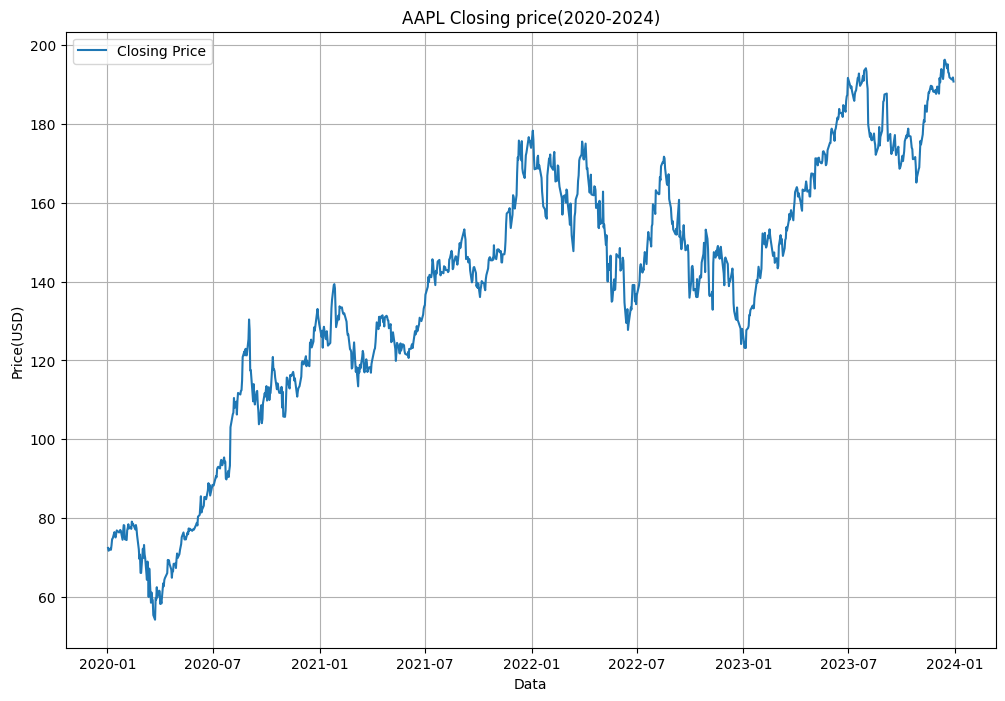

In [10]:
#plot closing price
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(data.index,data["Close"],label = "Closing Price")
plt.title("AAPL Closing price(2020-2024)")
plt.xlabel("Data")
plt.ylabel("Price(USD)")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# daily Returns
data["Daily Returns"] = data["Close"].pct_change()

print(data["Daily Returns"])

Date
2020-01-02         NaN
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
                ...   
2023-12-22   -0.005548
2023-12-26   -0.002841
2023-12-27    0.000518
2023-12-28    0.002227
2023-12-29   -0.005424
Name: Daily Returns, Length: 1006, dtype: float64


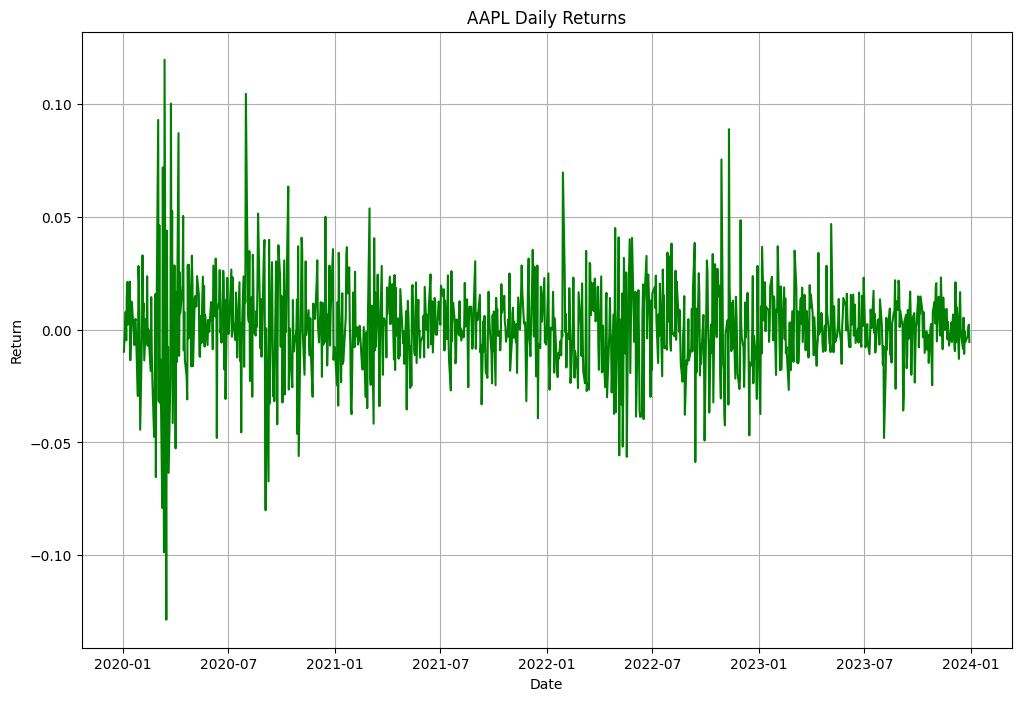

In [13]:
plt.figure(figsize=(12,8))
plt.plot(data.index,data["Daily Returns"],color = 'green')
plt.title("AAPL Daily Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid(True)
plt.show()

Date
2020-01-02           NaN
2020-01-03           NaN
2020-01-06           NaN
2020-01-07           NaN
2020-01-08           NaN
                 ...    
2023-12-22    183.572863
2023-12-26    183.858868
2023-12-27    184.149426
2023-12-28    184.479570
2023-12-29    184.814831
Name: MA_50, Length: 1006, dtype: float64
Date
2020-01-02           NaN
2020-01-03           NaN
2020-01-06           NaN
2020-01-07           NaN
2020-01-08           NaN
                 ...    
2023-12-22    176.609048
2023-12-26    176.832686
2023-12-27    177.047100
2023-12-28    177.253187
2023-12-29    177.452099
Name: MA_200, Length: 1006, dtype: float64


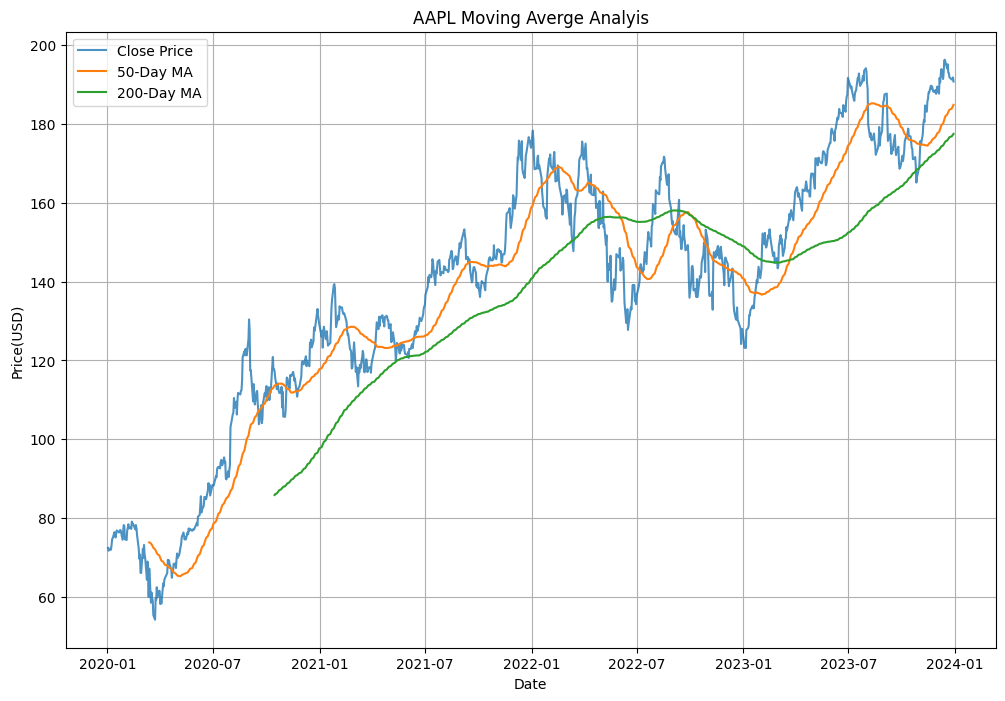

In [14]:
# Moving Averge 
data["MA_50"] = data["Close"].rolling(window=50).mean()
data["MA_200"] = data["Close"].rolling(window=200).mean()
print(data["MA_50"])
print(data["MA_200"])

#plot Moving  AVerge
plt.figure(figsize=(12,8))
plt.plot(data["Close"],label="Close Price",alpha=0.8)
plt.plot(data["MA_50"],label="50-Day MA")
plt.plot(data["MA_200"],label="200-Day MA")
plt.title("AAPL Moving Averge Analyis")
plt.xlabel("Date")
plt.ylabel("Price(USD)")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
#Stastical summary
print(data["Close"].describe())

Ticker         AAPL
count   1006.000000
mean     138.087081
std       33.389043
min       54.264336
25%      120.509689
50%      142.950020
75%      163.347752
max      196.256577
